In [39]:
import tushare as ts
import pandas as pd
df = ts.pro_bar( ts_code='000001.SZ', freq='D', start_date='19900101', end_date='20221202')
stock_hist = df[['trade_date', 'open','close','high','low']]
stock_hist.rename(columns={'trade_date':'Date', 'open':'Open','high':'High','low':'Low','close':'Close'},inplace=True)
# stock_hist = stock_hist[:5000]
stock_hist['Trade_date'] = pd.to_datetime(stock_hist['Date'])
stock_hist = stock_hist.iloc[::-1]
stock_hist['Date'] = pd.to_datetime(stock_hist['Date'])
stock_hist.set_index('Date', inplace=True)
# stock_hist = stock_hist.reset_index()
# stock_hist.drop(['index'],axis=1, inplace=True)
# PINGAN.dropna()
# PINGAN.interpolate(method='linear', limit_direction='forward', axis=0)
stock_hist

/var/folders/wf/l689qmr574b9nlzwszjgltk00000gn/T/ipykernel_4376/2502366619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_hist.rename(columns={'trade_date':'Date', 'open':'Open','high':'High','low':'Low','close':'Close'},inplace=True)
/var/folders/wf/l689qmr574b9nlzwszjgltk00000gn/T/ipykernel_4376/2502366619.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_hist['Trade_date'] = pd.to_datetime(stock_hist['Date'])


,Open,Close,High,Low,Trade_date
Date,,,,,
1997-07-04,34.00,34.59,35.28,33.40,1997-07-04
1997-07-07,34.40,31.50,34.40,31.13,1997-07-07
1997-07-08,31.00,33.07,33.20,30.80,1997-07-08
1997-07-09,33.38,34.00,34.18,32.70,1997-07-09
1997-07-10,34.00,33.08,34.59,33.00,1997-07-10
...,...,...,...,...,...
2022-11-28,11.90,11.81,11.92,11.69,2022-11-28
2022-11-29,12.16,12.99,12.99,12.13,2022-11-29
2022-11-30,12.90,13.03,13.34,12.82,2022-11-30


                rsi_6     rsi_14
Date                            
2000-07-27  80.919328  66.929449
2000-07-28  60.684725  56.542892
2000-07-31  61.588732  57.105148
2000-08-01  63.115346  57.983303
2000-08-02  50.637621  52.053859
2000-08-03  49.874267  51.686626
2000-08-04  50.323585  51.869463
2000-08-07  52.858972  52.830658
2000-08-08  47.610309  50.861689
2000-08-09  55.802411  53.749317
2000-08-10  47.522180  50.766035
2000-08-11  52.113509  52.301245
2000-08-14  63.994186  56.854746
2000-08-15  49.832405  51.773958
2000-08-16  56.442180  54.287828
2000-08-17  64.025771  57.471066
2000-08-18  56.631007  54.897957
2000-08-21  50.978656  52.859026
2000-08-22  37.503151  47.195894
2000-08-23  34.327271  45.659372
2000-08-24  35.267006  45.930189
2000-08-25  35.267006  45.930189
2000-08-28  33.871144  45.405312
2000-08-29  30.276168  44.050028
2000-08-30  22.317357  40.412687
2000-08-31  16.965587  37.112471
2000-09-01  16.623891  36.880795
2000-09-04  13.653916  34.776646
2000-09-05

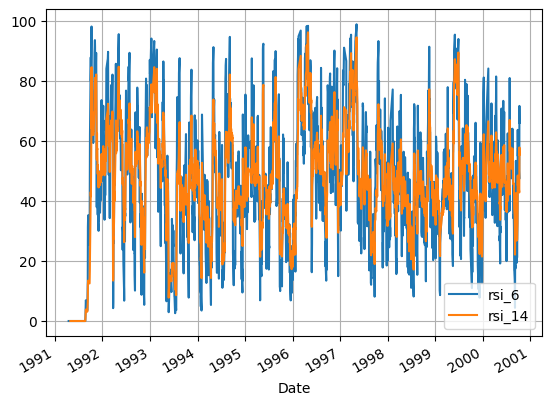

In [21]:
# import pandas as pd
import matplotlib.pyplot as plot
import talib

df_rsi = pd.DataFrame()
df_rsi['rsi_6'] = talib.RSI(stock_hist['Close'], timeperiod=6)
df_rsi['rsi_14'] = talib.RSI(stock_hist['Close'], timeperiod=14)

df_rsi[['rsi_6','rsi_14']].plot(grid=True)
print(df_rsi.tail(50))
plot.show()

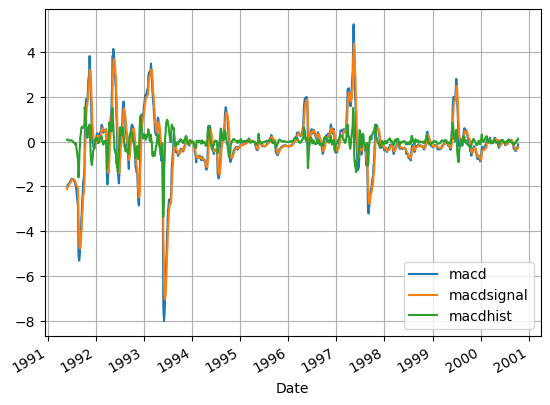

In [9]:
df_macd = pd.DataFrame()
df_macd['macd'], df_macd['macdsignal'], df_macd['macdhist'] = talib.MACD(stock_hist['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

df_macd[['macd','macdsignal','macdhist']].plot(grid=True)

plot.show()

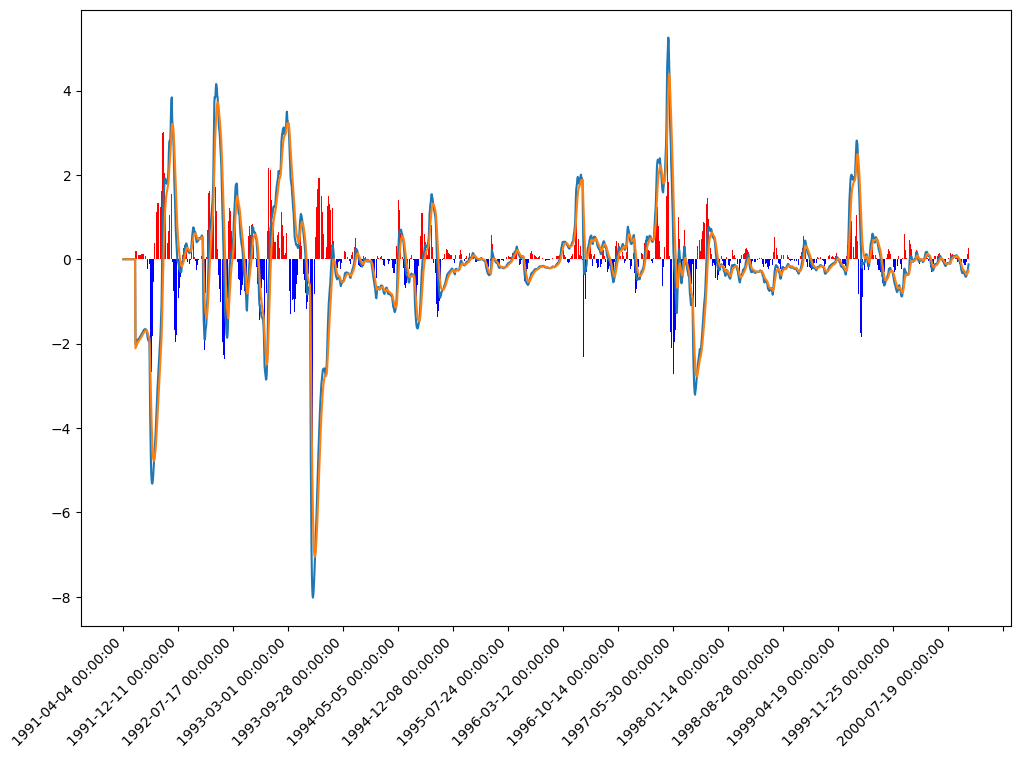

In [17]:
# import pandas as pd
# import talib
import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plot.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

dif, dea, bar = talib.MACD(stock_hist['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
dif[np.isnan(dif)], dea[np.isnan(dea)], bar[np.isnan(bar)] = 0, 0, 0
ax.plot(np.arange(0, len(df)), dif)
ax.plot(np.arange(0, len(df)), dea)
red_bar = np.where(bar > 0, 2 * bar, 0)
blue_bar = np.where(bar < 0, 2 * bar, 0)
ax.bar(np.arange(0, len(df)), red_bar, color="red")
ax.bar(np.arange(0, len(df)), blue_bar, color="blue")

ax.xaxis.set_major_locator(ticker.MaxNLocator(20))


def format_date(x, pos=None):
    # 由于前面股票数据在 date 这个位置传入的都是int
    # 因此 x=0,1,2,...
    # date_tickers 是所有日期的字符串形式列表
    if x < 0 or x > len(stock_hist['Trade_date']) - 1:
        return ''
    return stock_hist['Trade_date'][int(x)]


ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
plot.setp(plot.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plot.show()

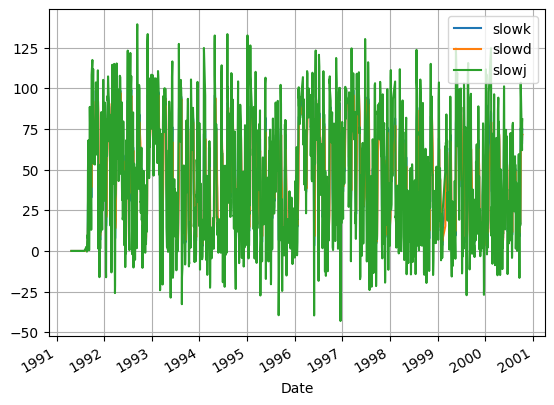

In [13]:
df_kdj = pd.DataFrame()
df_kdj['slowk'], df_kdj['slowd'] = talib.STOCH(stock_hist['High'],
                        stock_hist['Low'],
                        stock_hist['Close'],
                        fastk_period=9,
                        slowk_period=3,
                        slowk_matype=0,
                        slowd_period=3,
                        slowd_matype=0)

df_kdj['slowj'] = list(map(lambda x,y: 3*x-2*y,df_kdj['slowk'],df_kdj['slowd']))
df_kdj[['slowk','slowd','slowj']].plot(grid=True)
plot.show()

In [41]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    n1 = 10
    n2 = 20
    c = 0
    d = 0
    steps = {}

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        price = self.data.Close[-1]
        # for k,v in self.steps.items():
        #     print(k + ':' + v)
        if crossover(self.sma1, self.sma2):
            self.buy(sl=float(.95) * price)
        elif crossover(self.sma2, self.sma1):
            self.sell()


bt = Backtest(stock_hist, SmaCross,
              cash=10000, commission=.002, 
              exclusive_orders=True)

output = bt.run()#c=10,d=60,steps={'a':'cross', 'b':'above200'})
output
# bt.plot()

Start                     1997-07-04 00:00:00
End                       2022-12-02 00:00:00
Duration                   9282 days 00:00:00
Exposure Time [%]                       92.45
Equity Final [$]                   14645.8004
Equity Peak [$]                   49045.32588
Return [%]                          46.458004
Buy & Hold Return [%]              -62.705984
Return (Ann.) [%]                    1.615498
Volatility (Ann.) [%]               37.258975
Sharpe Ratio                         0.043359
Sortino Ratio                        0.067241
Calmar Ratio                         0.021428
Max. Drawdown [%]                  -75.390747
Avg. Drawdown [%]                   -8.078192
Max. Drawdown Duration     4991 days 00:00:00
Avg. Drawdown Duration      184 days 00:00:00
# Trades                                  316
Win Rate [%]                        36.075949
Best Trade [%]                     168.638859
Worst Trade [%]                    -28.300592
Avg. Trade [%]                    

In [28]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG
import talib

class SmaCross(Strategy):
    n2 = 20
    n6 = 60
    n12 = 120

    n20 = 200
    c = 0
    d = 0
    steps = {}

    def init(self):
        close = self.data.Close
        setattr(self, 'sma2', self.I(talib.EMA, close, self.n2))
        setattr(self, 'sma6', self.I(talib.EMA, close, self.n6))
        setattr(self, 'sma12', self.I(talib.EMA, close, self.n12))
        setattr(self, 'sma20', self.I(talib.EMA, close, self.n20))


    def next(self):
        price = self.data.Close[-1]
        # for k,v in self.steps.items():
        #     print(k + ':' + v)
        if self.sma2[-1] > self.sma6[-1] and self.sma6[-1] > self.sma12[-1] and self.sma12[-1] > self.sma20[-1]: #crossover(self.sma1, self.sma2):
            self.buy(sl=float(.95) * price)
        elif self.sma2[-1] < self.sma6[-1] and self.sma6[-1] < self.sma12[-1] and self.sma12[-1] < self.sma20[-1]:
            self.position.close()


bt = Backtest(stock_hist, SmaCross,
              cash=10000, commission=.002, 
              exclusive_orders=True)

output = bt.run()#c=10,d=60,steps={'a':'cross', 'b':'above200'})
bt.plot()
output

Start                     1991-04-04 00:00:00
End                       2000-10-11 00:00:00
Duration                   3478 days 00:00:00
Exposure Time [%]                   27.840416
Equity Final [$]                   2194.12506
Equity Peak [$]                     10114.114
Return [%]                         -78.058749
Buy & Hold Return [%]              -64.191961
Return (Ann.) [%]                  -15.274732
Volatility (Ann.) [%]               31.496919
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -82.36436
Avg. Drawdown [%]                  -41.281664
Max. Drawdown Duration     3131 days 00:00:00
Avg. Drawdown Duration     1568 days 00:00:00
# Trades                                  575
Win Rate [%]                        44.347826
Best Trade [%]                      25.748503
Worst Trade [%]                    -48.755989
Avg. Trade [%]                    

In [38]:
import re
str = 'Volatility (Ann.) [%]'
a = ''.join(re.findall(r'[A-Za-z]', str))
print(a)

VolatilityAnn


In [27]:
series_1 = pd.Series([1, 2, 3, np.nan, 5, np.nan, 6, 7], name='series_1', index=[
                     'A', '1', '2', 'B', '3', 'C', '4', 'D'])
# for idx, item in series_1.iteritems():
#     print(idx)
#     print(item)

series_1 = series_1.rename({'A':'A+'})
series_1

A+    1.0
1     2.0
2     3.0
B     NaN
3     5.0
C     NaN
4     6.0
D     7.0
Name: series_1, dtype: float64

In [71]:
stats = bt.optimize(n1=range(5, 30, 5),
                    n2=range(10, 70, 5),
                    maximize='Equity Final [$]',
                    constraint=lambda param: param.n1 < param.n2)
stats._trades

/Users/hanjie/Applications/venv2/lib/python3.8/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,3,127,132,166.43220,158.0156,-25.24980,-0.050571,2021-01-22,2021-01-29,7 days
1,59,122,132,159.31800,158.0156,-76.84160,-0.008175,2021-01-15,2021-01-29,14 days
2,61,150,158,153.10560,147.4148,-347.13880,-0.037169,2021-03-03,2021-03-15,12 days
3,76,208,232,117.93540,127.4890,726.07360,0.081007,2021-05-28,2021-07-02,35 days
4,113,315,334,86.06178,92.1432,687.20046,0.070663,2021-11-05,2021-12-02,27 days
5,107,357,360,97.19400,90.2076,-747.54480,-0.071881,2022-01-05,2022-01-10,5 days
6,6,395,401,86.13192,78.5000,-45.79152,-0.088607,2022-03-07,2022-03-15,8 days
7,120,387,401,80.59086,78.5000,-250.90320,-0.025944,2022-02-23,2022-03-15,20 days
8,9,451,460,55.43064,62.6532,65.00304,0.130299,2022-05-31,2022-06-14,14 days
9,171,444,460,54.83946,62.6532,1336.14954,0.142484,2022-05-20,2022-06-14,25 days


In [9]:
import pandas as pd
from backtesting.lib import SignalStrategy, TrailingStrategy
import talib 

class xMACross(SignalStrategy,
               TrailingStrategy):
    n1 = 10
    n2 = 25
    
    def init(self):
        # In init() and in next() it is important to call the
        # super method to properly initialize the parent classes
        super().init()
        
        # Precompute the two moving averages
        ema1 = self.I(talib.EMA, self.data.Close, self.n1)
        ema2 = self.I(talib.EMA, self.data.Close, self.n2)
        
        # Where sma1 crosses sma2 upwards. Diff gives us [-1,0, *1*]
        signal = (pd.Series(ema1) > ema2).astype(int).diff().fillna(0)
        signal = signal.replace(-1, 0)  # Upwards/long only
        
        # Use 95% of available liquidity (at the time) on each order.
        # (Leaving a value of 1. would instead buy a single share.)
        entry_size = signal * .95
                
        # Set order entry sizes using the method provided by 
        # `SignalStrategy`. See the docs.
        self.set_signal(entry_size=entry_size)
        
        # Set trailing stop-loss to 2x ATR using
        # the method provided by `TrailingStrategy`
        self.set_trailing_sl(2)

In [4]:
from backtesting import Backtest, Strategy
from backtesting.test import SMA, GOOG
import pandas as pd
from backtesting.lib import SignalStrategy, TrailingStrategy
import talib 

class MyBackTest(Backtest):
    def get_strategy(self):
        """Candlestick bar index of when the trade was entered."""
        return self._strategy
    
    strategy = property(get_strategy)

    #strategy, trades, equity, positions

def init(self):
    # In init() and in next() it is important to call the
    # super method to properly initialize the parent classes
    super(TranStrategy, self).init()
    
    # Precompute the two moving averages
    ema1 = self.I(talib.EMA, self.data.Close, self.n1)
    ema2 = self.I(talib.EMA, self.data.Close, self.n2)
    
    # Where sma1 crosses sma2 upwards. Diff gives us [-1,0, *1*]
    signal = (pd.Series(ema1) > ema2).astype(int).diff().fillna(0)
    signal = signal.replace(-1, 0)  # Upwards/long only
    
    # Use 95% of available liquidity (at the time) on each order.
    # (Leaving a value of 1. would instead buy a single share.)
    entry_size = signal * .95
            
    # Set order entry sizes using the method provided by 
    # `SignalStrategy`. See the docs.
    self.set_signal(entry_size=entry_size)
    
    # Set trailing stop-loss to 2x ATR using
    # the method provided by `TrailingStrategy`
    self.set_trailing_sl(2)

def next(self):
    pass
    
TranStrategy = type(
    'TranStrategy', 
    (SignalStrategy, TrailingStrategy),
    {
        'n1': 10,
        'n2': 25,
        'init': init,
        'next': next
    })

bt = MyBackTest(stock_hist, TranStrategy, commission=.002)

output = bt.run()
bt.strategy.trades
# bt.plot()
# output

In [47]:
def RSI(array, n):
    """Relative strength index"""
    # Approximate; good enough
    gain = pd.Series(array).diff()
    loss = gain.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    rs = gain.ewm(n).mean() / loss.abs().ewm(n).mean()
    return 100 - 100 / (1 + rs)

In [48]:
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply


class System(Strategy):
    d_rsi = 30  # Daily RSI lookback periods
    w_rsi = 30  # Weekly
    level = 70

    chains = {'buy':'aaa','sell':'dsd'}
    
    def init(self):
        # cccc
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)
        
        # Compute daily RSI(30)
        self.daily_rsi = self.I(RSI, self.data.Close, self.d_rsi)
        
        # To construct weekly RSI, we can use `resample_apply()`
        # helper function from the library
        self.weekly_rsi = resample_apply(
            'W-FRI', RSI, self.data.Close, self.w_rsi)
        
        
    def next(self):
        price = self.data.Close[-1]
        
        # If we don't already have a position, and
        # if all conditions are satisfied, enter long.
        if (not self.position and
            self.daily_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.daily_rsi[-1] and
            self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            price > self.ma10[-1]):
            
            # Buy at market price on next open, but do
            # set 8% fixed stop loss.
            self.buy(sl=.92 * price)
        
        # If the price closes 2% or more below 10-day MA
        # close the position, if any.
        elif price < .98 * self.ma10[-1]:
            self.position.close()

In [49]:
backtest = Backtest(stock_hist, System, commission=.002)
backtest.run()
backtest.plot()

Row(id='19649', ...)

In [50]:
from backtesting.test import GOOG

GOOG

,Open,High,Low,Close,Volume
2004-08-19,100.00,104.06,95.96,100.34,22351900
2004-08-20,101.01,109.08,100.50,108.31,11428600
2004-08-23,110.75,113.48,109.05,109.40,9137200
2004-08-24,111.24,111.60,103.57,104.87,7631300
2004-08-25,104.96,108.00,103.88,106.00,4598900
...,...,...,...,...,...
2013-02-25,802.30,808.41,790.49,790.77,2303900
2013-02-26,795.00,795.95,784.40,790.13,2202500
2013-02-27,794.80,804.75,791.11,799.78,2026100
2013-02-28,801.10,806.99,801.03,801.20,2265800


In [102]:
from abc import abstractmethod
from urllib.parse import parse_qs


class Person:
    @abstractmethod
    def init(self):
        '''
        print('this is super')
        '''
    
    def __init__(self, name):
        self._name = name

    def get_name(self):
        print('Getting name')
        return self._name

    def set_name(self, value):
        print('Setting name to ' + value)
        self._name = value

    def del_name(self):
        print('Deleting name')
        del self._name

    # Set property to use get_name, set_name
    # and del_name methods
    name = property(get_name, set_name, del_name, 'Name property')

class Kid(Person):
    param = ''
    def init(self, param):
        # super.init(self)
        self.param = param
        print('this is child - ' + self._name)

p = Person('Adam')
print(p.name)
p.name = 'John'
del p.name

k = Kid('Guagua')
k.init('Guagua')
# print(k.param)

Getting name
Adam
Setting name to John
Deleting name
this is child - Guagua
Guagua


In [86]:
def a():
    pass

a.__name__

'a'

In [103]:
from backtesting.test import SMA

from backtesting import Strategy
from backtesting.lib import crossover


class Sma4Cross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10
    
    def init(self):
        super.init()
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sma_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sma_exit = self.I(SMA, self.data.Close, self.n_exit)
        
    def next(self):
        
        if not self.position:
            
            # On upwards trend, if price closes above
            # "entry" MA, go long
            
            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sma_enter):
                    self.buy()
                    
            # On downwards trend, if price closes below
            # "entry" MA, go short
            
            else:
                if crossover(self.sma_enter, self.data.Close):
                    self.sell()
        
        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position
        
        else:
            if (self.position.is_long and
                crossover(self.sma_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sma_exit)):
                
                self.position.close()

In [104]:
from backtesting import Backtest
from backtesting.test import GOOG


backtest = Backtest(GOOG, Sma4Cross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
    n_enter=range(15, 35, 5),
    n_exit=range(10, 25, 5),
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

/Users/hanjie/Applications/venv2/lib/python3.8/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


In [105]:
heatmap

n1   n2   n_enter  n_exit
20   60   15       10        10102.86700
     80   15       10         9864.21924
     100  15       10        11003.21764
30   40   20       15        11771.28610
          25       15        16178.54842
                                ...     
100  200  15       10        13118.24766
          20       10        11308.46180
                   15        16350.94380
          25       10         8991.55294
          30       10         9953.07010
Name: Equity Final [$], Length: 177, dtype: float64

In [106]:
heatmap.sort_values().iloc[-3:]

n1   n2   n_enter  n_exit
100  120  15       10        18159.06414
     160  20       15        19216.54456
50   160  20       15        19565.69222
Name: Equity Final [$], dtype: float64

In [1]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    n1 = 20
    n2 = 200

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            # self.sell()
            self.position.close()


bt = Backtest(GOOG, SmaCross,
              cash=10000, commission=.001,
              exclusive_orders=True)

output = bt.run()
trades = output.loc['_trades']
print(trades)
bt.plot()

   Size  EntryBar  ExitBar  EntryPrice  ExitPrice         PnL  ReturnPct  \
0    24       533      874   405.53513     509.41  2492.99688   0.256143   
1    21       943      955   579.12855     577.08   -43.01955  -0.003537   
2    32      1180     1442   384.13375     512.04  4093.00000   0.332973   
3    30      1549     1684   547.54700     538.00  -286.41000  -0.017436   
4    26      1751     1766   606.60600     503.50 -2680.75600  -0.169972   
5    22      1814     1967   595.68509     584.21  -252.45198  -0.019264   
6    20      2008     2147   639.68905     797.80  3162.21900   0.247168   

   EntryTime   ExitTime Duration  
0 2006-09-29 2008-02-08 497 days  
1 2008-05-19 2008-06-05  17 days  
2 2009-04-28 2010-05-12 379 days  
3 2010-10-13 2011-04-27 196 days  
4 2011-08-02 2011-08-23  21 days  
5 2011-10-31 2012-06-11 224 days  
6 2012-08-08 2013-03-01 205 days  


Row(id='1449', ...)

In [22]:
equity = output.loc['_equity_curve']
equity

,Equity,DrawdownPct,DrawdownDuration
2004-08-19,10000.00000,0.000000,NaT
2004-08-20,10000.00000,0.000000,NaT
2004-08-23,10000.00000,0.000000,NaT
2004-08-24,10000.00000,0.000000,NaT
2004-08-25,10000.00000,0.000000,NaT
...,...,...,...
2013-02-25,67624.41986,0.019811,NaT
2013-02-26,67570.01986,0.020600,NaT
2013-02-27,68390.26986,0.008711,NaT
2013-02-28,68510.96986,0.006961,NaT


In [6]:
def return_multiple_params():
    a = 1
    b = 2
    c = 3
    return a,b,c

a,b,c = return_multiple_params()
a

1

In [17]:
class A:
    def ret_mult(self):
        a = 1
        b = 2
        c = 3
        return a,b,c

    def init(self):
        setattr(self, 'rets', self.ret_mult())
        setattr(self, 'v1', self.rets[1])


a = A()
a.init()
a.v1

2

In [20]:
def func(a, b, *args, **kwargs):
    return kwargs

a = func(1,2,{'c':3,'d':4,'e':5})
print(a)

SyntaxError: invalid syntax (1793905045.py, line 2)

In [3]:
# import pandas module
import pandas as pd
 
# create student  dataframe
data1 = pd.DataFrame({'id': [1, 2, 3, 4],
                      'name': ['manoj', 'manoja', 'manoji', 'manij']},
                     index=['one', 'two', 'three', 'four'])
 
 
# create marks  dataframe
data2 = pd.DataFrame({'s_id': [1, 2, 3, 6, 7],
                      'marks': [98, 90, 78, 86, 78]},
                     index=['one', 'two', 'three', 'siz', 'seven'])
 
# join two dataframes
print(data1.join(data2))

       id    name  s_id  marks
one     1   manoj   1.0   98.0
two     2  manoja   2.0   90.0
three   3  manoji   3.0   78.0
four    4   manij   NaN    NaN


In [4]:
# import pandas module
import pandas as pd
 
# create student  dataframe
data1 = pd.DataFrame({'id': [1, 2, 3, 4],
                      'name': ['manoj', 'manoja', 'manoji', 'manij']},
                     index=['one', 'two', 'three', 'four'])
 
 
# create marks  dataframe
data2 = pd.DataFrame({'s_id': [1, 2, 3, 6, 7],
                      'marks': [98, 90, 78, 86, 78]},
                     index=['one', 'two', 'three', 'siz', 'seven'])
 
# join two dataframes with merge
print(pd.merge(data1, data2, left_index=True, right_index=True))

       id    name  s_id  marks
one     1   manoj     1     98
two     2  manoja     2     90
three   3  manoji     3     78


In [5]:
# import pandas module
import pandas as pd
 
# create student  dataframe
data1 = pd.DataFrame({'id': [1, 2, 3, 4],
                      'name': ['manoj', 'manoja', 'manoji', 'manij']},
                     index=['one', 'two', 'three', 'four'])
 
 
# create marks  dataframe
data2 = pd.DataFrame({'s_id': [1, 2, 3, 6, 7],
                      'marks': [98, 90, 78, 86, 78]},
                     index=['one', 'two', 'three', 'siz', 'seven'])
 
# join two dataframes with concat
print(pd.concat([data1, data2], axis=1))

        id    name  s_id  marks
one    1.0   manoj   1.0   98.0
two    2.0  manoja   2.0   90.0
three  3.0  manoji   3.0   78.0
four   4.0   manij   NaN    NaN
siz    NaN     NaN   6.0   86.0
seven  NaN     NaN   7.0   78.0


In [14]:
import pandas as pd
import numpy as np
 
df1 = pd.DataFrame(np.random.randint(25, size=(4, 4)),
                   index=["1", "2", "3", "4"],
                   columns=["A", "B", "C", "D"])
 
df2 = pd.DataFrame(np.random.randint(25, size=(6, 4)),
                   index=["5", "6", "7", "8", "9", "10"],
                   columns=["A", "B", "C", "D"])
 
df3 = pd.DataFrame(np.random.randint(25, size=(4, 4)),
                   columns=["A", "B", "C", "D"])
 
df4 = pd.DataFrame(np.random.randint(25, size=(1, 4)),
                   index=["2"],
                   columns=["E", "F", "G", "H"])

df5 = pd.DataFrame(np.random.randint(25, size=(1, 2)),
                   index=["3"],
                   columns=["I", "J"])
 
display(df1, df2, df3, df4, df5)

,A,B,C,D
1,7,0,16,11
2,3,4,24,13
3,17,3,13,18
4,23,12,15,5


,A,B,C,D
5,18,8,11,15
6,23,0,6,19
7,12,6,10,22
8,2,8,2,0
9,10,7,4,20
10,19,13,23,7


,A,B,C,D
0,16,2,24,21
1,13,18,16,14
2,9,19,4,23
3,13,6,12,8


,E,F,G,H
2,12,15,9,20


,I,J
3,5,18


In [17]:
horizontal_concat = pd.concat([df1, df4], axis=1)
horizontal_concat = pd.concat([horizontal_concat, df5], axis=1)
horizontal_concat

,A,B,C,D,E,F,G,H,I,J
1,7,0,16,11,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4,24,13,12.0,15.0,9.0,20.0,NaN,NaN
3,17,3,13,18,NaN,NaN,NaN,NaN,5.0,18.0
4,23,12,15,5,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# concatenating df1 and df2 along rows
vertical_concat = pd.concat([df1, df2], axis=0)
 
# concatenating df3 and df4 along columns
horizontal_concat = pd.concat([df3, df4], axis=1)
 
display(vertical_concat, horizontal_concat)

,A,B,C,D
1,18,24,11,10
2,21,24,21,4
3,21,9,7,3
4,5,20,17,12
5,19,4,7,4
6,7,20,8,16
7,21,0,19,18
8,12,2,15,16
9,20,17,22,18
10,10,21,2,8


,A,B,C,D,E,F,G,H
0,7,21,15,11,9,10,20,21
1,16,5,6,3,6,18,10,1
2,12,1,20,20,21,0,7,8
3,7,19,20,24,5,23,14,19
